<center>
<h1>Stylized facts in financial markets</h1>
<h3>Julián Amaya</h3>
<h4>29 March 2021</h4>
</center>

***

# 1. Introduction

In this work we present a simple agent based model of a financial market, aiming to provide a link between the behavior of agents and the presence of heavy tails in the distribution of returns. Besides from heavy tails, there are two main stylized facts in financial markets:

- Absence of linear auto-correlations
- Volatility clustering

Alfi et al. [1] suggested the inclusion of two additional elements: nonstationarity and time scales, and self-organization. Here we will only focus on heavy tails, leaving the analysis of the other stylized facts for future works.

## Heavy tails

Empirical studies have shown that the distribution of returns of almost all financial assets -stocks, indexes and futures- exhibit a slow asymptotic decay that deviates from a Gaussian distribution. This is quantitatively reflected in the excess kurtosis, defined as:

\begin{equation}
\kappa = \frac{\mu_{4}}{\sigma^{4}} - 3
\end{equation}

where $\mu_{4}$ is the fourth central moment and $\sigma$ the standard deviation of the returns. $\kappa$ should be zero for a normal distribution, but ranges between 2 and 50 for daily returns and is even higher for intraday data.

# 2. Market model

We consider a stock market with $N$ agents, labeled by an integer $1\leq i\leq N$, trading in a single asset, whose price at time $t$ will be denoted $p(t)$. During each time period, an agent may choose either to buy the stock, sell it or not to trade. The demand for stock of agent $i$ is represented by a random variable $\phi_{i}$, which can take the values 0, -1 or 1: a positive value of $\phi_{i}$ represents an agent willing to buy stock, a negative value an agent eager to sell stock, while $\phi_{i}=0$ means that the agent does not trade during a given period.

In real markets, the outcomes of decisions of individual agents is generally not independent of the decision of other agents, since markets tend to organize according to interactions and communication among agents. They may form groups of various sizes which then share information and act in coordination. These groups of traders may align their decisions and act in unison to buy or sell.

We model the communication structure between market agents as a random graph. We consider agents as vertices of a random graph with $N$ nodes, which randomly group together in clusters. Once a cluster has formed, all it's members coordinate their individual demands so that all individuals in a given cluster have the same belief regarding future movements of the asset price. Hence members of a given cluster adopt a common market strategy and have the same demand for the stock, and different groups may trade with each other through a centralized market process.

These clusters form the connected components of the graph. The random formation of these clusters making independent decisions allows for a heterogeneous market structure. A given market cluster is characterized by its size and by the common demand of the agents in that cluster. We consider that the size of a cluster does not influence its decision whether to buy or sell, which is a reasonable assumption.

The aggregate excess demand $D(t)$ is the sum of the demands of all the investors:

\begin{equation*}
D(t) = \sum_{i=1}^{N}{\phi_{i}(t)}
\end{equation*}

Since all investors that belong to a same cluster at a given time act in the same way, the aggregate excess demand can be writen as the sum of the demands of the clusters. We can compute the demand of the j-th cluster, $C_{j}$, as:

\begin{equation}
W_{j}(t) = \sum_{i \in C_{j}}{\phi_{i}(t)}
\end{equation}

Summing the demands of all the clusters we obtain the aggregate excess demand:

\begin{equation}
D(t) = \sum_{j}{W_{j}(t)}
\end{equation}

The aggregate excess demans has an impact on the price of the stock, causing it to rise if the excess demand is positive and to fall if it is negative. We will follow the common assumption of proportionality between price change and excess demand:

\begin{equation*}
\Delta p(t) = p(t) - p(t-1) = \alpha D(t)
\end{equation*}

Here $\alpha$, which we consider constant, is a measure of the market depth. The constant $\alpha^{-1}$ measures the excess demand needed to move the price by one unit. Basically, it measures the sensitivity of price to fluctuations in demand.

We will denote the probabilities for the demand of an agent $\phi_{i}$ as follows:

\begin{equation}
P(\phi_{i} = 1) = a_{1}, \hspace{4mm} P(\phi_{i} = -1) = a_{2}, \hspace{4mm} P(\phi_{i} = 0) = 1-a_{1}-a_{2}
\end{equation}

These probabilities will depend on how the investor perceives the situation of the market, hence we won't take them as constant.


## 2.1. Investors

We consider two types of investors:

- *Fundamental investors*: they estimate a price for the stock, and define their behavior by analyzing the difference between the stock price $p(t)$ and their reference value $p_{f}$. If $p(t)>p_{f}$ they are more likely to sell, whereas if $p(t)<p_{f}$ they are more likely to buy. In principle, there may well exist different reference values for the price for different fundamental investors, but we will consider the simpler situation in which they all consider the same constant reference value for the price $p_{f}=0$.

- *Technical investors*: they analyze local trends on the price evolution, looking at the difference between the stock price $p(t)$ and the moving average $\text{MA}(t)$. If $p(t)>\text{MA}(t)$ they are more likely to buy, whereas if $p(t)<\text{MA}(t)$ they are more likely to sell. Although we will not be considering them in this work, more sophysticated investment analysis could be included, such as Momentum Investing, Dow Theory, or Elliot Wave Theory.

<div class="alert alert-block alert-info">
<b>Remark:</b> The reference value $p_{f}$ for the price used by fundamental investors leads to great stability of $p(t)$ around that value, while technical investors add volatility to the price.
</div>

We consider that the probabilities for the demand of the agents are given by:

\begin{equation}
a_{i} = S\left( \frac{p(t) - p_{f}}{d_{i}} + e_{i} \right), \hspace{4mm} i=1,2
\end{equation}

where $S(x)$ denotes the sigmoid function:

\begin{equation}
S(x) = \frac{1}{1 + e^{-x}}
\end{equation}

The constants $d_{i}$ and $e_{i}$ may be different for the two type of investors. In the following plot we show the functions used in this work.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

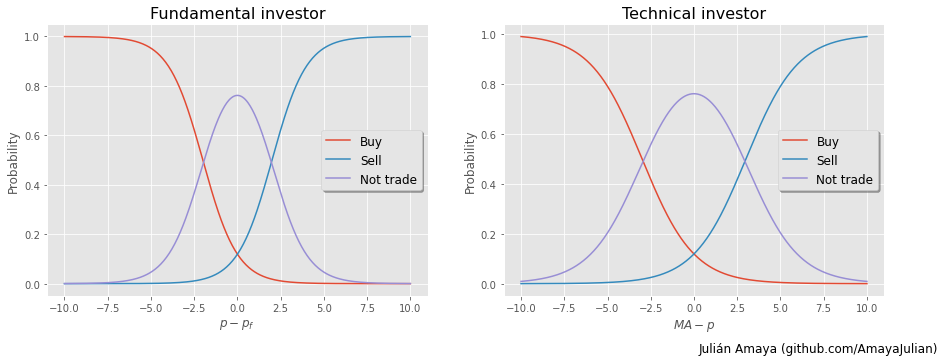

In [3]:
x = np.linspace(-10, 10, 500)

plt.subplots(figsize = (15, 5))

# Fundamental investors
a1_f = sigmoid(-x - 2)
a2_f = sigmoid(x - 2)

plt.subplot(1, 2, 1)
plt.plot(x, a1_f, label='Buy')
plt.plot(x, a2_f, label='Sell')
plt.plot(x, 1 - a1_f - a2_f, label='Not trade')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('$p-p_{f}$', size=12)
plt.ylabel('Probability', size=12)
plt.title('Fundamental investor', size=16)
plt.legend(prop={'size':12}, fancybox=True, shadow=True)

# Technical investors
a1_t = sigmoid(-x/1.5 - 2)
a2_t = sigmoid(x/1.5 - 2)

plt.subplot(1, 2, 2)
plt.plot(x, a1_t, label='Buy')
plt.plot(x, a2_t, label='Sell')
plt.plot(x, 1 - a1_t - a2_t, label='Not trade')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('$MA-p$', size=12)
plt.ylabel('Probability', size=12)
plt.title('Technical investor', size=16)
plt.legend(prop={'size':12}, fancybox=True, shadow=True, loc=5)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## 2.2. Volume of daily operations

We also incorporate changes in the volume of daily operations, which depend on the tendency of the price. According to Stanley and Preis [4]:

> _Whenever a stock market switches from a rising to a falling trend or vice versa, the volume of transactions peaks (...) The volume of each transaction increases dramatically as the end of a trend is reached (...) as price start to rise or fall, stock is sold more frequently and in larger chunks._

We consider that a change in the trend occurs when the slope of the moving average changes its sign. Moreover, the volume of daily operations will be a function of the change in the slope, which we take to be:

\begin{equation}
V(x) = c_{1} - \frac{c_{2}}{cosh^{2} \left(\frac{x}{c_{3}}\right)}
\end{equation}

The constants $c_{1}$, $c_{2}$ and $c_{3}$ will be different depending if a change of trend happends. In the following plot we show the functions we will be using in this work.

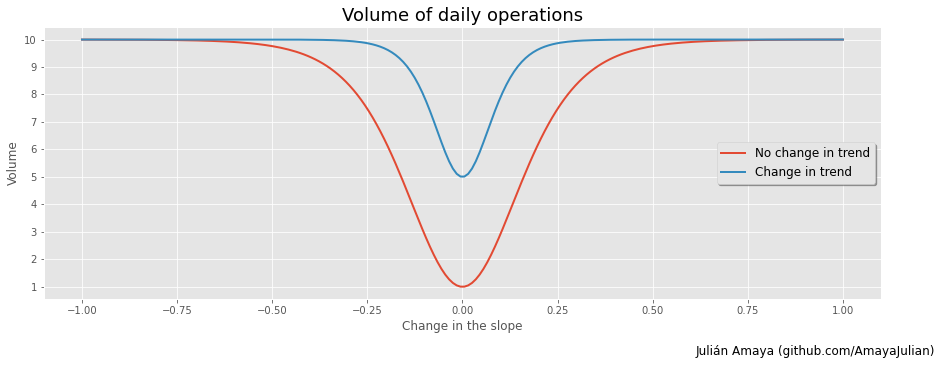

In [4]:
x = np.linspace(-1, 1, 200)
V1 = 10 - 9 / (np.cosh(x/0.2)**2)
V2 = 10 - 5 / (np.cosh(x/0.1)**2)

plt.figure(figsize = (15, 5))
plt.plot(x, V1, lw=2, label='No change in trend')
plt.plot(x, V2, lw=2, label='Change in trend')
plt.xticks(np.arange(-1, 1.1, 0.25))
plt.yticks(np.arange(1, 11))
plt.xlabel('Change in the slope', size=12)
plt.ylabel('Volume', size=12)
plt.title('Volume of daily operations', size=18)
plt.legend(prop={'size':12}, fancybox=True, shadow=True, loc=5)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## 2.3 Random graphs

The communication structure between market agents is highly dependent on the graph. We consider two different types of random graphs:

- **Lattice graph**: We create a lattice in $\mathbb{R}^{2}$ of size $L\times L$ and occupy each site with probability $p$. Thus we generate clusters which correspond to independent groups of investors with different behaviors.

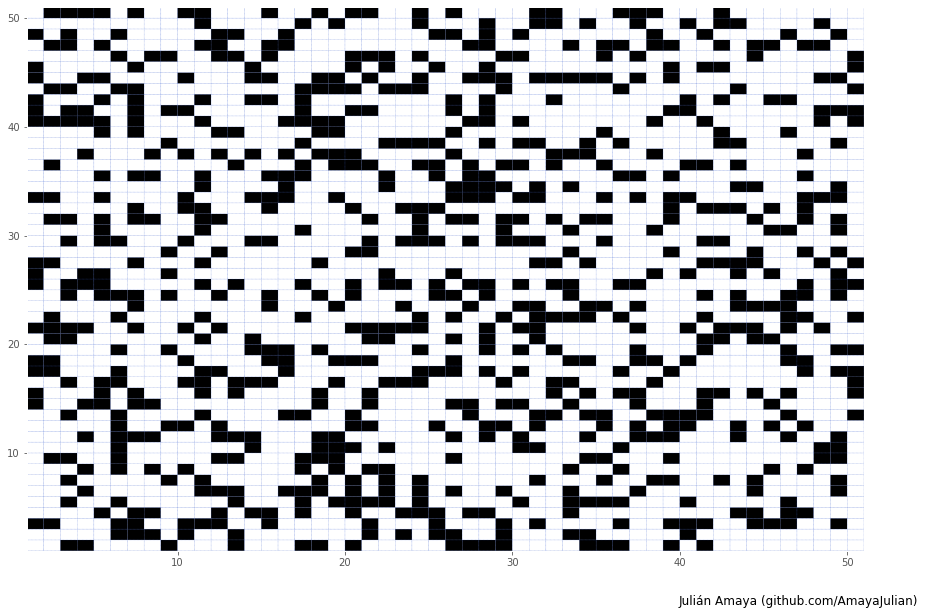

In [5]:
# Length of the lattice
L = 50
# Probability of occupation
p = 0.3
# Create a lattice graph
X = np.random.rand(L, L)
X = np.array(X < p, dtype=int)

# Plot the graph
xx = np.arange(1,L+2)
yy = xx

plt.figure(figsize = (15, 10))
plt.pcolor(xx, yy, X, cmap='Greys', edgecolors='royalblue', lw=0.3, ls='dotted')
plt.xticks(np.arange(10, 60, 10))
plt.yticks(np.arange(10, 60, 10))
plt.figtext(0.95, 0.05, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

- **Eröds-Rényi graph**: It's constructed by connecting nodes randomly. Each edge is included in the graph with probability p independent from every other edge.

In [6]:
def er_graph(N, p):
    """
    Generate an Erdös-Rényi graph with N nodes and probability of connection p.
    
    Arguments:
    N -- number of nodes
    p -- probability of connection between nodes
    
    Returns:
    G -- Erdös-Rényi graph
    """
    # Create empty graph
    G = nx.Graph()
    # Add N nodes in the graph
    G.add_nodes_from(range(N))
    # Loop over all pairs of nodes
    for node_1 in G.nodes():
        for node_2 in G.nodes():
            # Add an edge with probability p
            if node_1<node_2 and np.random.rand()<p:
                G.add_edge(node_1, node_2)
    return G

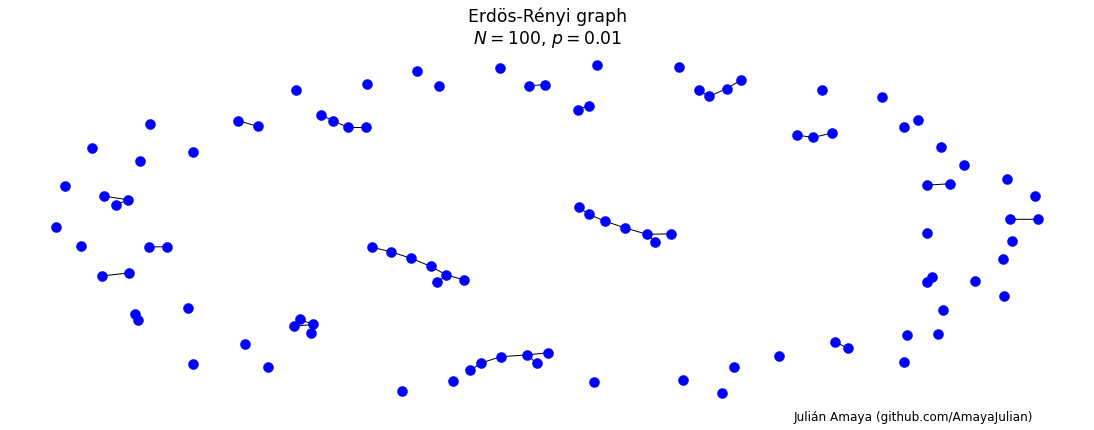

In [7]:
# Number of nodes
N = 100
# Probability of connection
p = 0.01
# Generate an Erdös-Rényi graph
G = er_graph(N,p)

# Plot the graph
plt.figure(figsize = (15, 5))
nx.draw(G, with_labels=False, node_size=100, node_color='blue', edge_color='black')
plt.title('Erdös-Rényi graph\n$N={}$, $p={}$'.format(N,p), size='xx-large')
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

---
## Auxiliary functions

In [8]:
def gaussian(x, mu, sig):
    """
    Computes the probability density function at x for a gaussian distribution with mean mu and standard deviation sig.
    
    Arguments:
    x -- value at which we want to evaluate the probability density function
    mu -- mean of the distribution
    sig -- standard deviation of the distribution
    
    Returns:
    y --  value of the probability density function
    """
    y = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / (sig * np.sqrt(2 * np.pi))
    return y

In [9]:
def mov_avg(x, delta):
    """
    Computes the moving average taking the past delta points.
    
    Arguments:
    x -- list for which we want to compute the moving average
    delta -- number of points used for the average
    
    Returns:
    y -- list containing the moving average
    """
    
    y = []
    for i in range(len(x)):
        if i<delta:
            y.append(x[i])
        else:
            avg = 0
            for j in range(delta):
                avg += x[i - j]
            y.append(avg / delta)
    return y

In [10]:
def neighbors(k, l, cluster, visit, w, n_burn):
    """
    Given an occupied site (k,l) of the lattice, it updates the list of sites to burn.
    
    Arguments:
    k -- x coordinate of the site
    l -- y coordinate of the site
    visit -- array of visited sites
    w -- array of sites to burn
    n_burn -- number of sites tu burn
    
    Returns:
    visit -- array of visited sites
    w -- array of sites to burn
    n_burn -- number of sites to burn
    """
    # If the site (k, l) hasn't been visited and has no assigned cluster
    if cluster[k, l]==0 and visit[k, l]==1:
        # The site has been visited
        visit[k, l] = 0
        # Add it to the list of sites to burn
        w[n_burn] = (k, l)
        # Increase the counter by one
        n_burn += 1
        
    return visit, w, n_burn

In [11]:
def clusters_weights(X):
    """
    Given a lattice graph, it returns a list with the weights of the clusters present in the graph.
    
    Arguments:
    X -- graph
    
    Returns:
    weights -- list with the weights of each cluster
    """
    # Size of the lattice
    L = X.shape[0]
    # Number of cluster to which each site belongs
    cluster = np.zeros((L, L))
    # If it's equal to 1, the site hasn't been visited
    visit = np.ones((L, L))
    # List for the weights of the clusters
    weights = list()
    # Number of clusters
    cluster_number = 0
    # Array for the sites to burn
    w = np.zeros((X.sum(),2))
    
    # Loop over all sites in the lattice
    for i in range(L):
        for j in range(L):
            # If it's occupied, hasn't been asigned to any cluster and hasn't been visited
            if X[i,j]!=0 and cluster[i, j]==0 and visit[i, j]==1:
                # Increase the number of clusters
                cluster_number += 1
                # First site of the cluster that I am going to burn
                w[0] = (i, j)
                # Counter for number of sites to burn
                n_burn = 1
                # Set the cluster weight to 0
                cs = 0
                
                while n_burn!=0:
                    # Decrease the counter of sites to burn
                    n_burn -= 1
                    # Recover the site that I am burning
                    (k, l) = w[n_burn]
                    k = int(k)
                    l = int(l)
                    # Assign it its cluster number
                    cluster[k, l] = cluster_number
                    # Increase the weight of the cluster
                    cs += 1
                    
                    # Look at the neighbors of the burned site
                    # If it's occupied call neighbors()
                    if k<L-1:
                        if X[k+1, l]!=0:
                            visit, w, n_burn = neighbors(k+1, l, cluster, visit, w, n_burn)
                    if k>0:
                        if X[k-1, l]!=0:
                            visit, w, n_burn = neighbors(k-1, l, cluster, visit, w, n_burn)
                    if l<L-1:
                        if X[k, l+1]!=0:
                            visit, w, n_burn = neighbors(k, l+1, cluster, visit, w, n_burn)
                    if l>0:
                        if X[k, l-1]!=0:
                            visit, w, n_burn = neighbors(k, l-1, cluster, visit, w, n_burn)
                
                # Append the weight of the cluster
                weights.append(cs)
                
    return weights

In [12]:
def general_clusters_weights(G):
    """
    Given any NetowrkX graph, it returns a list with the weights of the clusters present in the graph.
    
    Arguments:
    G -- graph
    
    Returns:
    weights -- list with the weights of each cluster
    """
    # Create a copy of the input graph
    new_graph = G.copy()
    # Set the attribute 'burn'
    nx.set_node_attributes(new_graph, name='burn', values=True)
    # Create an empty list to store the weights
    weights = []
    
    for node in new_graph.nodes:
        if new_graph.nodes[node]['burn']:
            mass = 1
            new_graph.nodes[node]['burn'] = False
            for neighbor in new_graph.neighbors(node):
                mass += 1
                new_graph.nodes[neighbor]['burn'] = False
            weights.append(mass)
    
    return weights

---

# 3. Results

We simulate the evolution of the price of a stock using the proposed market model by following the next steps:

- We generate a list of daily prices using a Gaussian random walk and compute the 5 day moving average.

- At time $t$ we compute the change in the slope of the moving average, and see whether there is a change of sign, indicating a change in the trend.

- We compute the volume o daily operations and the probabilities that determine the behavior of the different kind of investors.

- We select a cluster and assign it fundamental investors with a probability of 0.2 (otherwise they are fundamental investors). We  compute the demand for that cluster, and then move on to the next one. Once we are finished with all the clusters, we add up the individual demands.

- With the obtained excess demand $D(t)$ we compute the new price $p(t)$.

- We calcuate the new moving average $\text{MA}(t)$, taking the new price into account. Then we increase time by one step.

## 3.1. Lattice graph

In [13]:
# --------------------------
# Number of days to simulate
t_max = 1000

# -----------------------
# Properties of the graph
# Length
L = 100
# Probability of occupation
p = 0.4

# -------------------------
# Generate a list of prices
price = [0]
for _ in range(10):
    price.append(price[-1] + np.random.randn() / 5)
price = np.array(price)
# Number of points used for the moving average
avg = 5
# Compute the moving average
price_mov_avg = mov_avg(price, avg)

print('Time:\tPrice:')
# -------------------
# Daily temporal loop
for t in range(t_max):
    # Change in the slope
    delta_p = price_mov_avg[-1] - 2 * price_mov_avg[-2] + price_mov_avg[-3]
    # Change in the trend
    delta_t = (price_mov_avg[-1] - price_mov_avg[-2]) * (price_mov_avg[-2] - price_mov_avg[-3])
    # Volume of daily operations
    if delta_t>0:
        vol_op = 10 - 9 / (np.cosh(delta_p/0.2)**2)
    else:
        vol_op = 10 - 5 / (np.cosh(delta_p/0.1)**2)
    
    # Define the parameters for the behavior of the agents
    change_f = price[-1]
    change_t = price_mov_avg[-1] - price[-1]   
    # Fundamental investors
    a1 = sigmoid(-change_f - 2)
    a2 = sigmoid(change_f - 2)
    # Technical investors
    b1 = sigmoid(-change_t/1.5 - 2)
    b2 = sigmoid(change_t/1.5 - 2)
    
    # Create a variable to add the demands
    demand = 0
    
    # Intraday temporal loop
    for t2 in range(int(vol_op)):
        # Create the graph
        X = np.array(np.random.rand(L, L) < p, dtype=int)
        # Number of occupied sites
        n_investors = X.sum()
        # Weight of each cluster
        weights = clusters_weights(X)
        
        # Demand of the investors
        for weight in weights:
            if np.random.rand()<0.5:
                # Fundamental investors
                r = np.random.rand()
                if r<a2: phi = -weight
                elif r<a2+a1: phi = weight
                else: phi = 0
                demand += phi
            else:
                # Technical investors
                r = np.random.rand()
                if r<b2: phi = -weight
                elif r<b2+b1: phi = weight
                else: phi = 0
                demand += phi
    
    new_price = price[-1] + demand / (2 * n_investors)
    
    # Save the new price
    price = np.append(price, new_price)
    
    # Compute the moving average
    price_mov_avg = mov_avg(price, avg)
    
    if t%100==0:
        print('{}\t{}'.format(t, price[-1]))

Time:	Price:
0	0.17128692797659595
100	0.03299349911409234
200	0.008433698363986285
300	0.035475910881734636
400	-0.08337925203793309
500	-0.005427812193756763
600	-0.01523573851268752
700	0.0471647846146689
800	0.0023136934625084503
900	0.04176974514032043


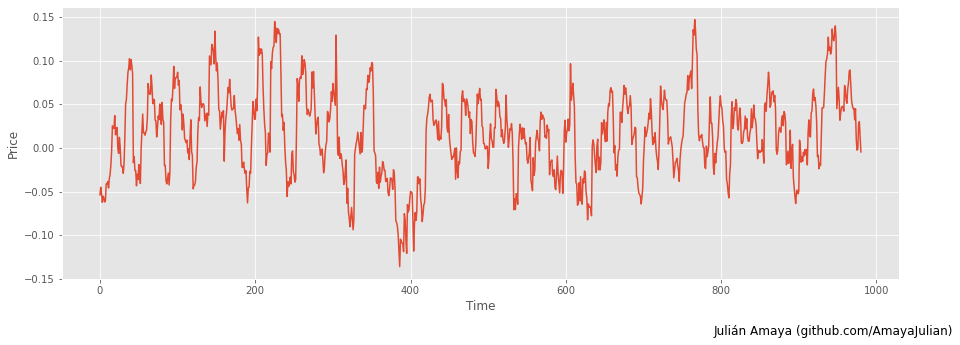

In [14]:
# Plot the results from the simulation
plt.figure(figsize = (15, 5))
plt.plot(price[30:])
plt.xlabel('Time', size=12)
plt.ylabel('Price', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

<div class="alert alert-block alert-info">
<b>Remark:</b> To calculate the returns we add a constant to the price series, in order to avoid negative or near-zero prices.
</div>

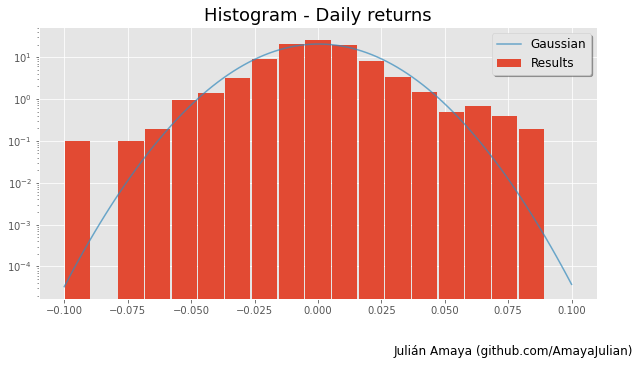

In [15]:
# Compute the returns
returns = []
for n in range(1,len(price)):
    returns.append((price[n]-price[n-1])/(price[n-1]+1))
returns = np.array(returns[30:])

# Plot a histogram of the returns
plt.figure(figsize = (10, 5))
plt.hist(returns, bins=np.linspace(-0.1, 0.1, 20), rwidth=0.95, density=True, label='Results')
x = np.linspace(-0.1, 0.1, 100)
plt.plot(x, gaussian(x, returns.mean(), returns.std()), alpha=0.7, label='Gaussian')
plt.yscale('log')
plt.title('', size=18)
plt.title('Histogram - Daily returns', size=18)
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

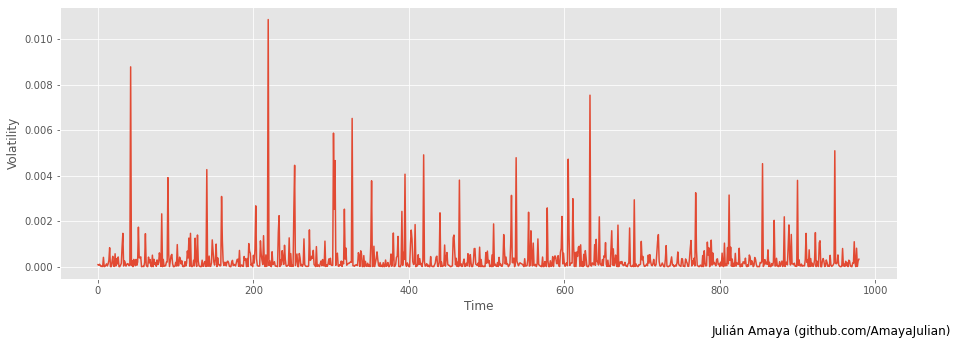

In [16]:
# Plot the volatility
plt.figure(figsize = (15, 5))
plt.plot(returns**2)
plt.xlabel('Time', size=12)
plt.ylabel('Volatility', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## 3.2. Erdös-Rényi Graph

In [17]:
# --------------------------
# Number of days to simulate
t_max = 1000

# -----------------------
# Properties of the graph
# Number of nodes
N = 100
# Probability of connection
p = 0.01

# -------------------------
# Generate a list of prices
price = [0]
for _ in range(10):
    price.append(price[-1] + np.random.randn() / 5)
price = np.array(price)
# Number of points used for the moving average
avg = 5
# Compute the moving average
price_mov_avg = mov_avg(price, avg)


print('Time:\tPrice:')
# -------------------
# Daily temporal loop
for t in range(t_max):
    # Change in the slope
    delta_p = price_mov_avg[-1] - 2 * price_mov_avg[-2] + price_mov_avg[-3]
    # Change in the trend
    delta_t = (price_mov_avg[-1] - price_mov_avg[-2]) * (price_mov_avg[-2] - price_mov_avg[-3])
    # Volume of daily operations
    if delta_t>0:
        vol_op = 10 - 9 / (np.cosh(delta_p/0.2)**2)
    else:
        vol_op = 10 - 5 / (np.cosh(delta_p/0.1)**2)
    
    # Define the parameters for the behavior of the agents
    change_f = price[-1]
    change_t = price_mov_avg[-1] - price[-1]
    # Fundamental investors
    a1 = sigmoid(-change_f - 2)
    a2 = sigmoid(change_f - 2)
    # Technical investors
    b1 = sigmoid(-change_t/1.5 - 2)
    b2 = sigmoid(change_t/1.5 - 2)
    
    # Create a variable to add the demands
    demand = 0
    
    # Create the graph
    G = er_graph(N, p)
    # Compute the weight of each cluster
    weights = general_clusters_weights(G)
    
    # Intraday temporal loop
    for t2 in range(int(vol_op)):
        # Demand of the investors
        for weight in weights:
            if np.random.rand()<0.6:
                # Fundamental investors
                r = np.random.rand()
                if r<a2: phi = -weight
                elif r<a2+a1: phi = weight
                else: phi = 0
                demand += phi
            else:
                # Technical investors
                r = np.random.rand()
                if r<b2: phi = -weight
                elif r<b2+b1: phi = weight
                else: phi = 0
                demand += phi
    
    new_price = price[-1] + demand / (2 * N)
    
    # Save the new price
    price = np.append(price, new_price)
    
    # Compute the moving average
    price_mov_avg = mov_avg(price, avg)
    
    if t%100==0:
        print('{}\t{}'.format(t, price[-1]))

Time:	Price:
0	-0.09465172396074045
100	-0.07965172396074047
200	0.01534827603925959
300	0.20534827603925976
400	-0.0946517239607402
500	0.045348276039259755
600	-0.16465172396074026
700	0.005348276039259692
800	-0.12465172396074035
900	0.14534827603925965


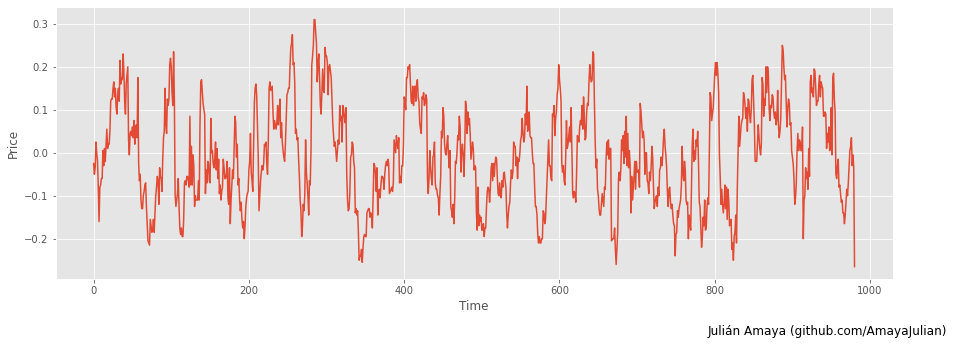

In [18]:
# Plot the results from the simulation
plt.figure(figsize = (15, 5))
plt.plot(price[30:])
plt.xlabel('Time', size=12)
plt.ylabel('Price', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

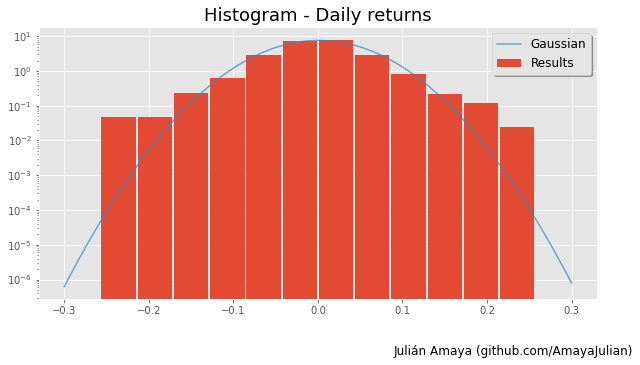

In [19]:
# Compute the returns
returns = []
for n in range(1,len(price)):
    returns.append((price[n]-price[n-1]) / (price[n-1] + 1))
returns = np.array(returns[30:])

# Plot a histogram of the returns
plt.figure(figsize = (10, 5))
plt.hist(returns, bins=np.linspace(-0.3, 0.3, 15), rwidth=0.95, density=True, label='Results')
x = np.linspace(-0.3, 0.3, 100)
plt.plot(x, gaussian(x, returns.mean(), returns.std()), alpha=0.7, label='Gaussian')
plt.yscale('log')
plt.title('Histogram - Daily returns', size=18)
plt.legend(prop={'size':12}, fancybox=True, shadow=True)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

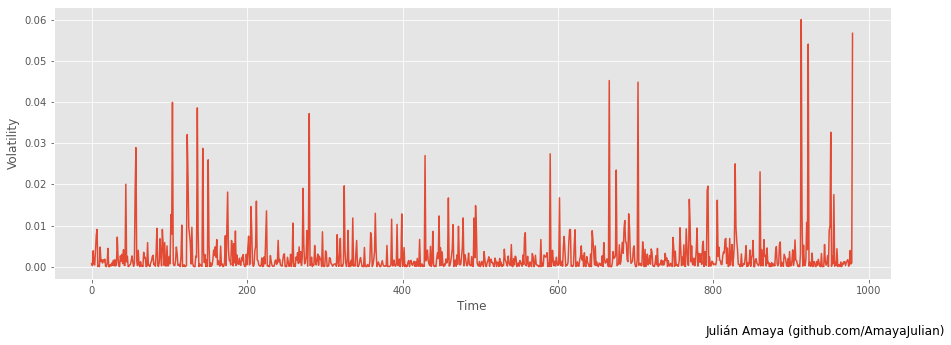

In [20]:
# Plot the volatility
plt.figure(figsize = (15, 5))
plt.plot(returns**2)
plt.xlabel('Time', size=12)
plt.ylabel('Volatility', size=12)
plt.figtext(0.95, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

# 4. References

1. R. Cont, J.P. Bouchaud. “Herd Behavior And Aggregate Fluctuations In Financial Markets.” *Macroeconomic Dynamics*, vol. 4, no. 2, 2000, pp. 170–196., doi:10.1017/s1365100500015029.

2. V. Alfi, et al. “Minimal Agent Based Model for Financial Markets I.” *The European Physical Journal B*, vol. 67, no. 3, 2009, pp. 385–397., doi:10.1140/epjb/e2009-00028-4.

3. R.N. Mantegna, H.E. Stanley. *An introduction to Econophysics: Correlation and Complexity in Finance*. Cambridge University Press, New York, NY, USA, 2000.

4. T. Preis, H.E. Stanley. “Bubble Trouble.” *Physics World*, vol. 24, no. 05, 2011, pp. 29–32., doi:10.1088/2058-7058/24/05/34.